## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [5]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


1.

In [6]:
category_counts = df['category'].value_counts()
print(category_counts)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [7]:
#The top list categories are:
# Sports & Outdoors                         836265
#Beauty                                     19312
#Handmade Clothing, Shoes & Accessories     19229
#Bath & Body                                19092
#Birthday Gifts                             18978

2.

<Axes: xlabel='category'>

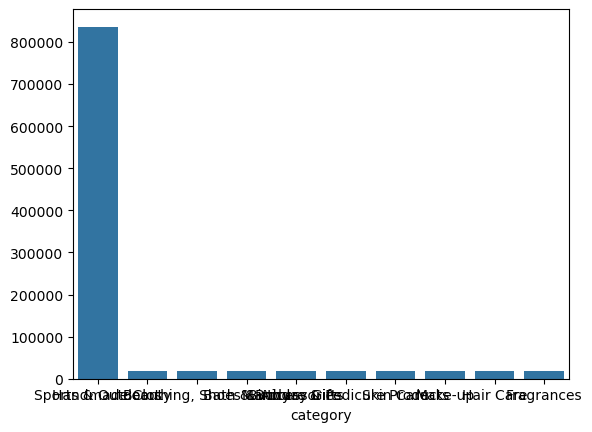

In [8]:
sns.barplot(x = category_counts.index [:10], y=category_counts.values[:10])

3.

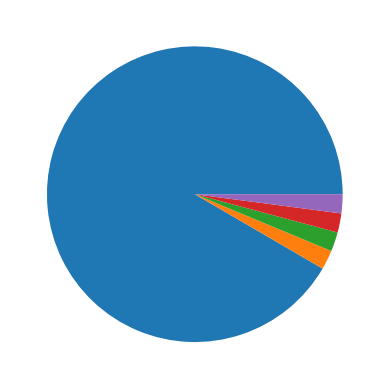

In [9]:
Top5_category = category_counts.head(5)
top5 = category_counts.head(5)

plt.pie(top5.values)
plt.show()

In [10]:
# Yes sport articles dominate the piechart

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


1.

In [19]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0] 

print(mean_price)
print(median_price)
print(mode_price)

89.24380943923663
19.09
9.99


In [20]:
#Comparing all of them:
# Looking at the mean, the value is skewing negativately the chart
# the median is the strongest against outliers.
# the mode shows the most common price listed.

2.

In [21]:
Price_variance = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
quarter1 = df['price'].quantile(0.25)
quarter4 = df['price'].quantile(0.75)
interquarter = quarter4 - quarter1

print (Price_variance)
print(price_std)
print(price_range)
print(interquarter)


119445.48532256528
345.60886175352226
100000.0
36.0


In [22]:
# The variance is very high, wich means that the prices are allover
# the range is huge, probably we have luxury items
# the interquartile shows us where 50% of the values are concentrated


3.

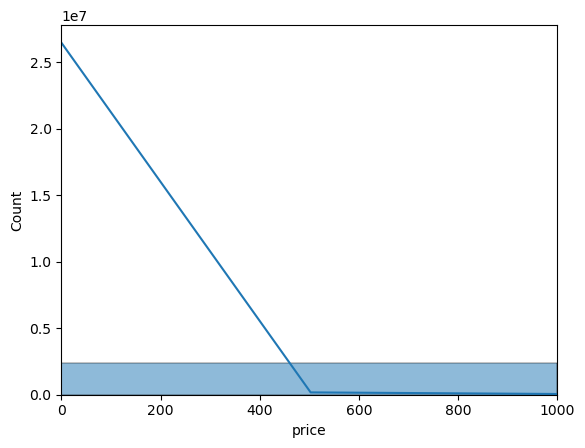

In [23]:
sns.histplot(df['price'], bins=100, kde=True) 
plt.xlim(0, 1000)
plt.show()

In [26]:
# the majority of the products are cheaper
# Means that this marketplace is dominated by acessible products, and there is a "premium (more expensive) segment"


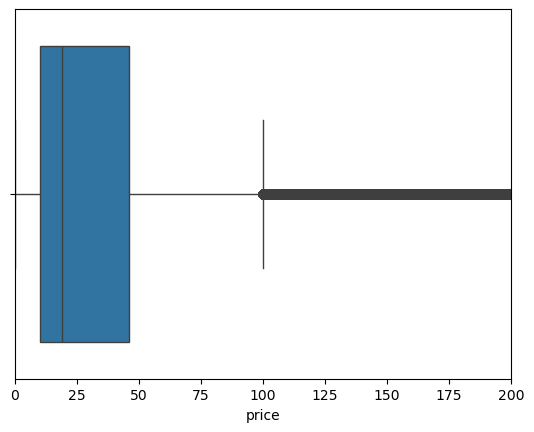

In [25]:
sns.boxplot(x=df['price'])
plt.xlim(0, 200)
plt.show()

In [27]:
# The plot box shows where the central pricing is  (between Q1 and Q3)
# the points outside (outliers) the box shows the much more expensive products

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

1.

In [32]:
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [33]:
df_stars = df[df['stars'] > 0]

In [34]:
df_stars = df[df['stars'] > 0]

mean_rating = df_stars['stars'].mean()
median_rating = df_stars['stars'].median()
mode_rating = df_stars['stars'].mode()[0]

print(mean_rating)
print(median_rating)
print(mode_rating)

4.31916076222691
4.4
4.5


In [ ]:
# I noticed first that the mean was low, and the mode was 0, witch means that is not correct, so i decided to remove the 0.0 stars, that means they have not been rewied
# It has a very high rating 4.3 stars means that the majority of the clients are satisfied with the products


2.

In [36]:
rating_variance = df_stars['stars'].var()
rating_std = df_stars['stars'].std()
rating_range = df_stars['stars'].max() - df['stars'].min()
quarter1_rating = df_stars['stars'].quantile(0.25)
quarter4_rating = df_stars['stars'].quantile(0.75)
interquarter_rating = quarter4_rating - quarter1_rating

print (rating_variance)
print(rating_std)
print(rating_range)
print(interquarter_rating)


0.3083433752380519
0.5552867504614637
5.0
0.5


In [ ]:
# There is a small variance, clients rate the products consistent, and a high level of satisfaction
# The deviance is short so it is near the median
# The interquarter means that the interval beween the values is very narrow


3.

In [37]:
Skewness = df_stars['stars'].skew()
kurtosis = df_stars['stars'].kurt()

print (Skewness)
print (kurtosis)

-2.3795681122127945
9.78193769066435


In [38]:
# The skewness negative tells us that the distribution is skewed to the left side, wich mean that the majority of the stars are high (between 5, 4)
# There are few products with low star rating
# The kurtosis tells us that the distribution is sharp, means also that the consentration is between 5 and 4
# There are few products outside of this peak

4.

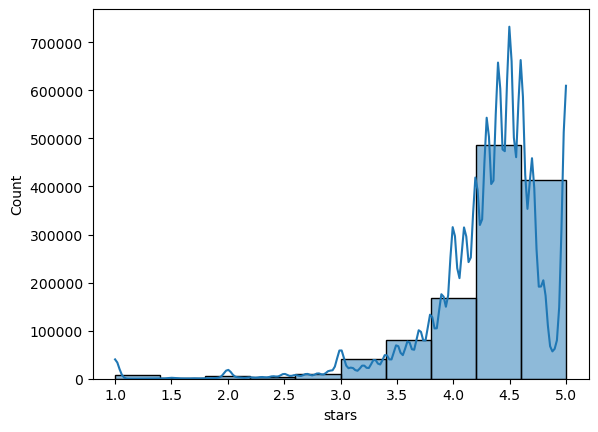

In [41]:
sns.histplot(df_stars['stars'], bins=10, kde=True)
plt.show()

In [42]:
# The most common Rating is 4.4 stars